# Trabalho de Sistemas Inteligentes para a Bioinformática

#### Trabalho realizado por:
* [Alexandre Areias, PG45962](https://github.com/areias03)
* [Rodrigo Ribeiro, PG45969](https://github.com/Rodrigo-Ribeiro26)
* [Rúben Silva, PG44580](https://github.com/RubenPTFCP)
* [Tiago Oliveira, PG45476](https://github.com/Malavita02)

## Introdução:
(Escrever introdução a explicar os objetivos do trabalho)

## Exploração inicial dos data sets em estudo

### pheno_training.csv e pheno_test.csv
(Escrever explicação breve do que tem este dataset)

In [1]:
# Carregar os datasets
import numpy as np
import pandas as pd

pheno_train = pd.read_csv("train/pheno_training.csv")
pheno_test = pd.read_csv("test/pheno_test.csv")
pheno_train

,Unnamed: 0,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex
0,Simulated_328,53.618,24.127,0.0,0,0.0,0.0,0.0,0.0,15.750,133.077,3.020,0
1,Simulated_1644,36.811,27.992,0.0,0,0.0,0.0,0.0,0.0,15.881,108.914,5.480,0
2,Simulated_1710,49.429,23.664,0.0,0,0.0,0.0,0.0,0.0,15.891,110.064,4.388,1
3,Simulated_1732,48.842,26.804,0.0,0,0.0,0.0,0.0,0.0,15.918,128.059,5.119,0
4,Simulated_1727,60.738,29.862,0.0,0,0.0,0.0,0.0,0.0,15.841,169.913,5.740,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3610,Simulated_1783,33.802,37.049,0.0,0,0.0,0.0,0.0,0.0,15.942,109.080,3.141,0
3611,Simulated_3425,69.249,36.800,0.0,0,1.0,0.0,0.0,0.0,15.781,145.953,5.478,1
3612,Simulated_1789,28.561,26.463,0.0,0,0.0,0.0,0.0,0.0,12.198,124.091,4.870,1
3613,Simulated_1592,70.278,31.945,0.0,1,0.0,0.0,0.0,0.0,15.609,142.038,2.492,0


In [2]:
pheno_train.dtypes

Unnamed: 0            object
Age                  float64
BodyMassIndex        float64
Smoking              float64
BPTreatment            int64
PrevalentDiabetes    float64
PrevalentCHD         float64
PrevalentHFAIL       float64
Event                float64
Event_time           float64
SystolicBP           float64
NonHDLcholesterol    float64
Sex                    int64
dtype: object

In [3]:
pheno_train.describe()

,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex
count,3615.000000,3614.000000,3599.000000,3615.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3615.000000,3608.000000,3615.000000
mean,49.504423,27.071102,0.232842,0.155463,0.061728,0.032828,0.026094,0.084175,13.756255,136.341473,4.086256,0.443707
std,14.848086,4.724096,0.422701,0.362396,0.240695,0.178212,0.159438,0.277689,5.686619,22.037649,1.092486,0.496890
min,24.098000,15.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-23.709000,88.097000,1.558000,0.000000
25%,36.808500,23.774250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.740000,120.019500,3.336000,0.000000
50%,50.909000,26.402000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.820000,132.962000,3.990000,0.000000
75%,61.759000,29.499750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.881000,149.061500,4.721000,1.000000
max,74.242000,56.935000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,253.075000,12.988000,1.000000


Text(0, 0.5, 'Frequência')

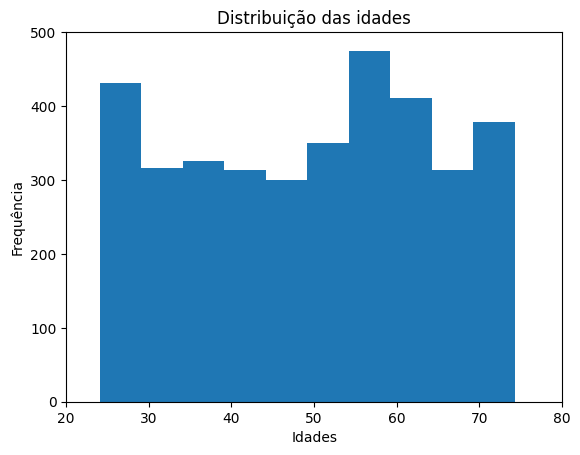

In [4]:
import matplotlib.pyplot as plt

plt.hist(pheno_train["Age"])
plt.axis([20, 80, 0, 500])
plt.title("Distribuição das idades")
plt.xlabel("Idades")
plt.ylabel("Frequência")

Text(0, 0.5, 'Frequência')

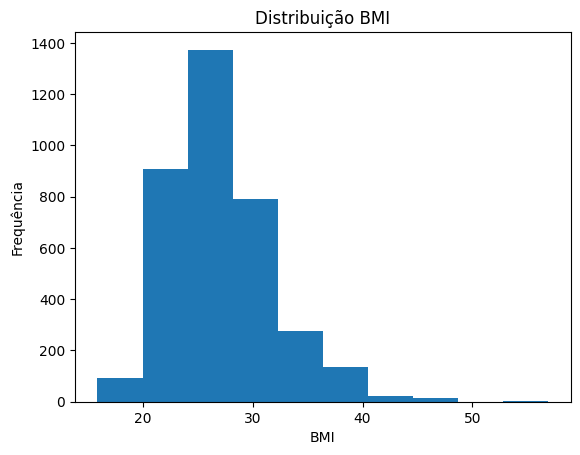

In [5]:
plt.hist(pheno_train["BodyMassIndex"])
plt.title("Distribuição BMI")
plt.xlabel("BMI")
plt.ylabel("Frequência")

<function matplotlib.pyplot.show(close=None, block=None)>

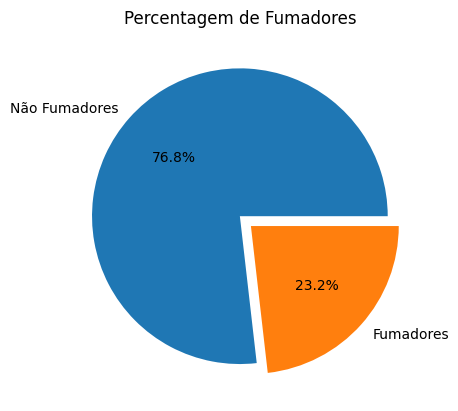

In [6]:
perc_smoking = pd.Series.value_counts(pheno_train["Smoking"] == 1) / pheno_train.Smoking.size *100
plt.pie(perc_smoking, labels= ["Não Fumadores", "Fumadores"], autopct= '%1.1f%%', explode= (0,0.1))
plt.title("Percentagem de Fumadores")
plt.show

<Figure size 1000x600 with 0 Axes>

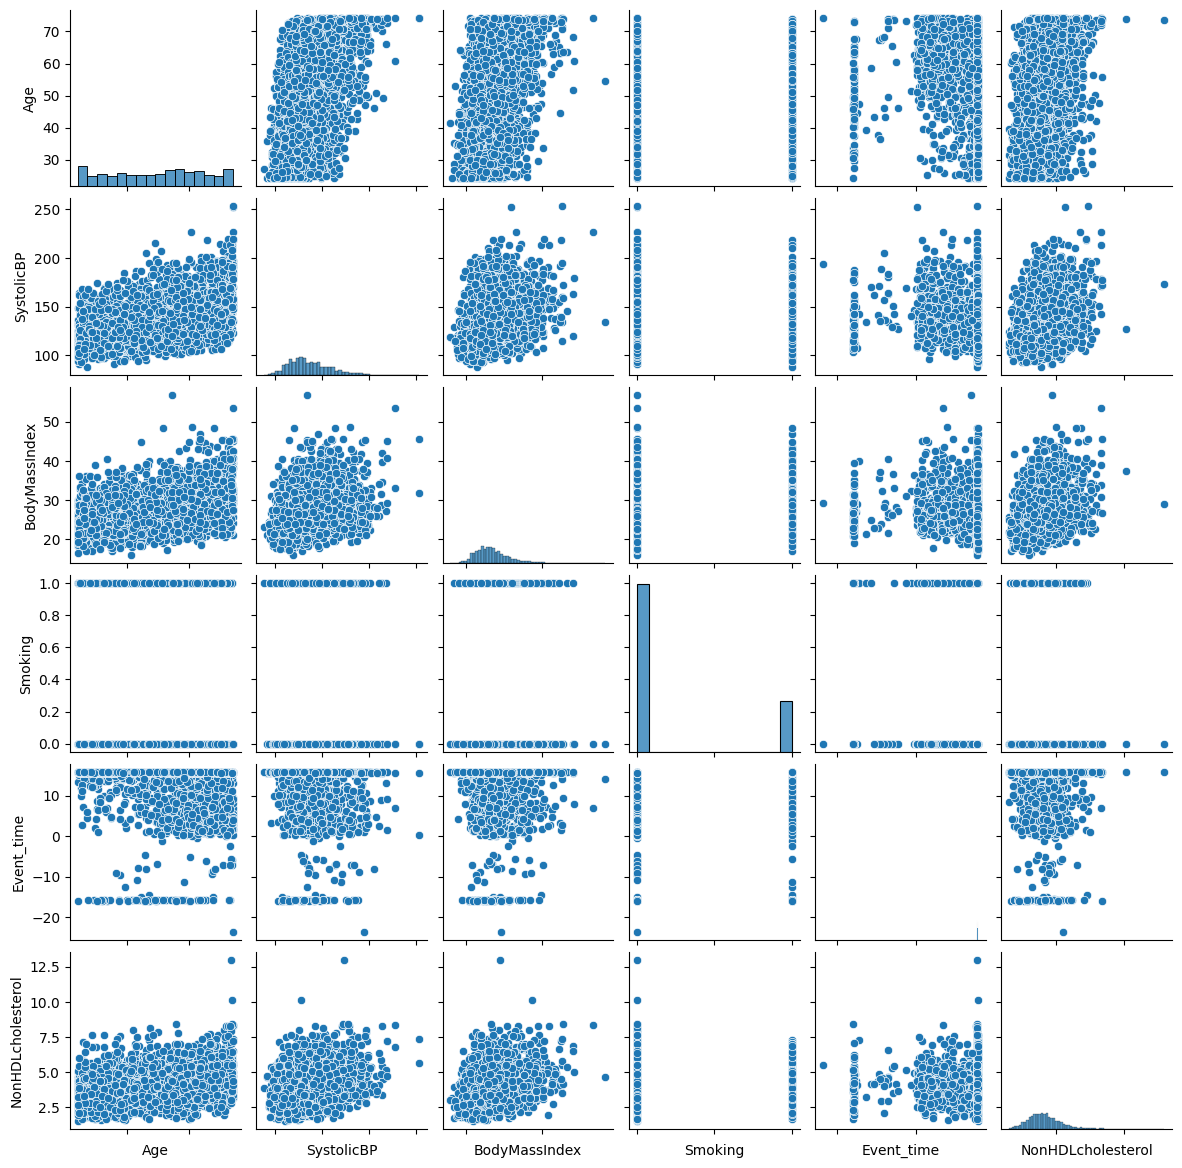

In [7]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(pheno_train[['Age','SystolicBP','BodyMassIndex','Smoking','Event_time','NonHDLcholesterol']]
                 ,height=2)
g.set(xticklabels=[])

## Pré processamento dos dados

In [8]:
# Confirmar se tem valores nulos
print(f"Número de valores nulos: {pheno_train.isna().sum().sum()}")
# Remover pacientes com valores nulos
pheno_train = pheno_train.dropna()
pheno_test = pheno_test.dropna()

# Defenir os dados alvo (data target - y) -> Pacientes que tiveram enfarte antes ou durante o estudo
pheno_train_y = pheno_train.PrevalentHFAIL + pheno_train.Event 
pheno_train_y = pheno_train_y.map({2: 1, 0: 0, 1: 1}) # tornar as variaveis boleanos
pheno_test_y = pheno_test.PrevalentHFAIL + pheno_test.Event 
pheno_test_y = pheno_test_y.map({2: 1, 0: 0, 1: 1}) 

# Retirar features desnecessárias para o dataset de treino
pheno_train_X = pheno_train.drop(columns = ["Unnamed: 0","Event", "Event_time", "PrevalentHFAIL"]) 
pheno_test_X = pheno_test.drop(columns = ["Unnamed: 0","Event", "Event_time", "PrevalentHFAIL"]) 

Número de valores nulos: 279


Reparamos que o dataset estava desbalanceado e aplicamos uma técica chamada SMOTE para resolver esse problema. Esta técnica só foi utilizada nos dados de treino.

In [9]:
# SMOTE -> Synthetic Minority Over-sampling Technique
from collections import Counter
print('Original dataset shape %s' % Counter(pheno_train_y))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
pheno_train_X, pheno_train_y = sm.fit_resample(pheno_train_X, pheno_train_y)
print('Resampled dataset shape %s' % Counter(pheno_train_y))

Original dataset shape Counter({0: 3157, 1: 383})
Resampled dataset shape Counter({0: 3157, 1: 3157})


Standardização do data set de treino, para utilizar de forma mais eficiente modelos lineares.

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pheno_train_X = scaler.fit_transform(pheno_train_X)

# Machine learning - pheno dataset

### Unsupervised learning - PCA
(Explicar porque é que utilizamos isto e interpretar resultado.)

[0.79774419 0.17797589]


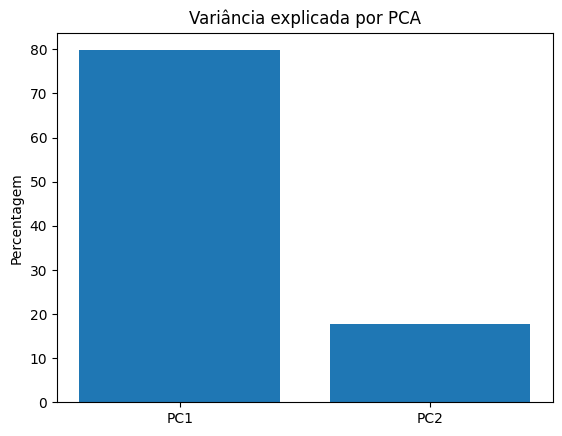

In [10]:
from sklearn.decomposition import PCA

n=2
pca_pheno = PCA(n_components=n)
pca_pheno.fit(pheno_train_X)
x_reduced = pca_pheno.transform(pheno_train_X)


print(pca_pheno.explained_variance_ratio_)  
plt.bar(range(n), pca_pheno.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância explicada por PCA")
plt.ylabel("Percentagem")
plt.show()

### Supervised learning models
(Explicação das métricas utilizadas e outras coisas)
##### Logistic Regression

In [95]:
from IPython.display import Image
Image(url='https://cdn.discordapp.com/attachments/1044302870792634408/1065239193653088307/1_fxiTNIgOyvAombPJx5KGeA.png')

Recall score: 0.4406779661016949


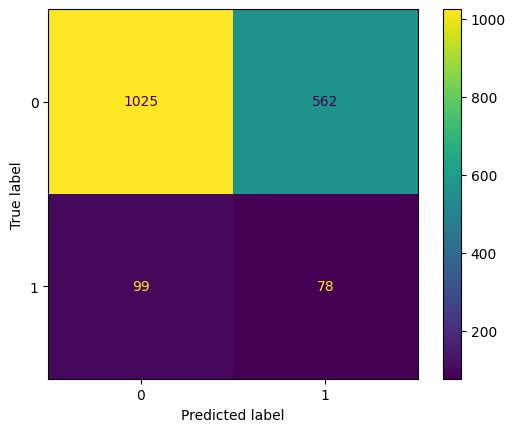

In [11]:
from sklearn import linear_model
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

logistic = linear_model.LogisticRegression(C=1e5, solver = "liblinear", multi_class = "auto")
logistic = logistic.fit(pheno_train_X, pheno_train_y)
logistic_prev = logistic.predict(pheno_test_X)
print( "Recall score:", recall_score(pheno_test_y, logistic_prev))

cm_logreg = confusion_matrix(pheno_test_y, logistic_prev, labels=logistic.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logistic.classes_)
disp1.plot()
plt.show()

##### SVM's

Recall score:  0.4971751412429379


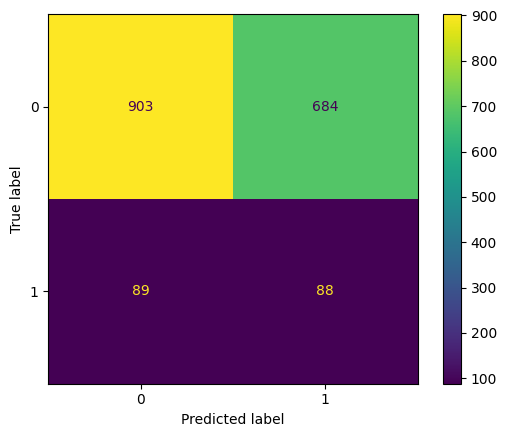

In [12]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
SVM = svm.SVC(gamma=0.001, C=100.)
SVM = SVM.fit(pheno_train_X, pheno_train_y)
svm_pred = SVM.predict(pheno_test_X)
print("Recall score: ", recall_score(pheno_test_y, svm_pred))
#cross_scores = cross_val_score(SVM, pheno_test_y, svm_pred, cv = 5)
#print(cross_scores)

cm_svm = confusion_matrix(pheno_test_y, svm_pred, labels=SVM.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=SVM.classes_)
disp_svm.plot()
plt.show()

##### KNeighborsClassifier

Recall score:  0.4180790960451977


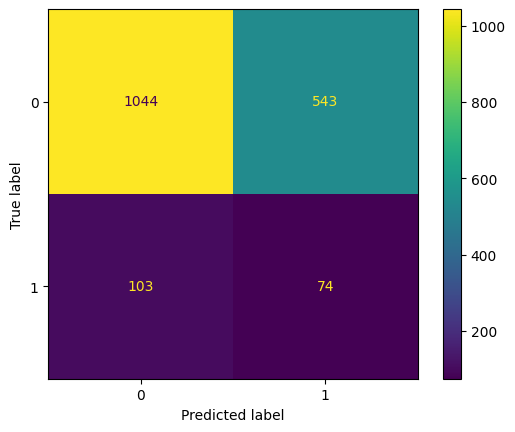

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(pheno_train_X, pheno_train_y)
knn_pred = knn.predict(pheno_test_X)
print("Recall score: ", recall_score(pheno_test_y, knn_pred))

cm_knn = confusion_matrix(pheno_test_y, knn_pred, labels=knn.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp_knn.plot()
plt.show()

### Random Forest Classifier

In [15]:
# AUX
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
param_dist = {"max_depth": [2, 3, None], "max_features": [2,4,6], "min_samples_split": [2,4,6],
              "min_samples_leaf": [2,4,6], "bootstrap": [True, False], "criterion": ["gini", "entropy"]}

rand_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv = 5)
rand_search =rand_search.fit(pheno_train_X, pheno_train_y)
print (rand_search.best_estimator_)
report(rand_search.cv_results_)
print(rand_search.score(pheno_test_X, pheno_test_y))

RandomForestClassifier(bootstrap=False, max_features=4, min_samples_leaf=2,
                       min_samples_split=6)
Model with rank: 1
Mean validation score: 0.887 (std: 0.056)
Parameters: {'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 4, 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}

Model with rank: 2
Mean validation score: 0.872 (std: 0.062)
Parameters: {'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 2, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.867 (std: 0.062)
Parameters: {'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 6, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}

0.8299319727891157


Recall score:  0.14124293785310735


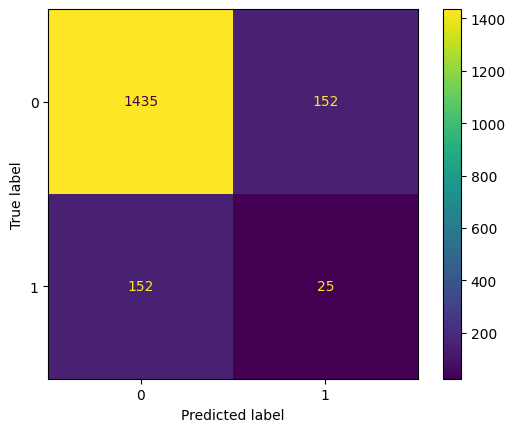

In [17]:
rf_model_best = RandomForestClassifier(n_estimators=100, min_samples_split = 6, min_samples_leaf = 2, max_features = 4, max_depth = None, criterion = 'gini', bootstrap = False)
rf_model_best.fit(pheno_train_X, pheno_train_y)
rf_pred = rf_model_best.predict(pheno_test_X)

print("Recall score: ", recall_score(pheno_test_y, rf_pred))

cm_rf = confusion_matrix(pheno_test_y, rf_pred, labels = rf_model_best.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels = rf_model_best.classes_)
disp_rf.plot()
plt.show()

### Deeplearning - MLPClassifier
(Explicação de usar este e as limitações do deeplearnig no nossos dados devido a serem relativamente poucos dados)

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50, 20))
scores = cross_val_score(mlp, pheno_train_X, pheno_train_y, cv = 5)
print(scores.mean())

c:\Users\Tiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Tiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Tiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptr

0.6544226572959762


c:\Users\Tiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Deep learning tensorflow

In [28]:
"""import tensorflow as tf

# Xavier
def xavier_init(shape):
  # Computes the xavier initialization values for a weight matrix
  in_dim, out_dim = shape
  xavier_lim = tf.sqrt(6.)/tf.sqrt(tf.cast(in_dim + out_dim, tf.float32))
  weight_vals = tf.random.uniform(shape=(in_dim, out_dim), 
                                  minval=-xavier_lim, maxval=xavier_lim, seed=22)
  return weight_vals

# denselayer
class DenseLayer(tf.Module):

  def __init__(self, out_dim, weight_init=xavier_init, activation=tf.identity):
    # Initialize the dimensions and activation functions
    self.out_dim = out_dim
    self.weight_init = weight_init
    self.activation = activation
    self.built = False

  def __call__(self, x):
    if not self.built:
      # Infer the input dimension based on first call
      self.in_dim = x.shape[1]
      # Initialize the weights and biases using Xavier scheme
      self.w = tf.Variable(xavier_init(shape=(self.in_dim, self.out_dim)))
      self.b = tf.Variable(tf.zeros(shape=(self.out_dim,)))
      self.built = True
    # Compute the forward pass
    z = tf.add(tf.matmul(x, self.w), self.b)
    return self.activation(z)

# MLP
class MLP(tf.Module):

  def __init__(self, layers):
    self.layers = layers

  @tf.function
  def __call__(self, x, preds=False): 
    # Execute the model's layers sequentially
    for layer in self.layers:
      x = layer(x)
    return x

hidden_layer_1_size = 700
hidden_layer_2_size = 500
output_size = 10

mlp_model = MLP([
    DenseLayer(out_dim=hidden_layer_1_size, activation=tf.nn.relu),
    DenseLayer(out_dim=hidden_layer_2_size, activation=tf.nn.relu),
    DenseLayer(out_dim=output_size)])

def accuracy(y_pred, y):
  # Compute accuracy after extracting class predictions
  class_preds = tf.argmax(tf.nn.softmax(y_pred), axis=1)
  is_equal = tf.equal(y, class_preds)
  return tf.reduce_mean(tf.cast(is_equal, tf.float32))

print(accuracy())"""

AttributeError: module 'tensorflow' has no attribute 'MLP'

## Readcounts dataset
(Explicação do dataset, nomeadamente o que são os valores e o nome das bacterias)

In [33]:
# Carregar os datasets
readcounts_train = pd.read_csv("train/readcounts_training.csv")
readcounts_test = pd.read_csv("test/readcounts_test.csv")
readcounts_train

,Unnamed: 0,Simulated_328,Simulated_1644,Simulated_1710,Simulated_1732,Simulated_1727,Simulated_2196,Simulated_1681,Simulated_1651,Simulated_1603,...,Simulated_1676,Simulated_1630,Simulated_1605,Simulated_2202,Simulated_1682,Simulated_1783,Simulated_3425,Simulated_1789,Simulated_1592,Simulated_1731
0,k__Archaea;p__;c__;o__;f__;g__;s__,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,k__Archaea;p__Candidatus_Korarchaeota;c__;o__;...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5743,k__Viruses;p__unclassified_bacterial_viruses;c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5744,k__Viruses;p__unclassified_viruses;c__Leptopil...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5745,k__Viruses;p__unclassified_viruses;c__Mollivir...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5746,k__Viruses;p__unclassified_viruses;c__Smacovir...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
readcounts_train.describe()

,Simulated_328,Simulated_1644,Simulated_1710,Simulated_1732,Simulated_1727,Simulated_2196,Simulated_1681,Simulated_1651,Simulated_1603,Simulated_1601,...,Simulated_1676,Simulated_1630,Simulated_1605,Simulated_2202,Simulated_1682,Simulated_1783,Simulated_3425,Simulated_1789,Simulated_1592,Simulated_1731
count,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,...,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000
mean,187.729819,201.291232,129.467989,273.373695,116.749130,132.382220,55.174843,87.517223,468.192241,134.719555,...,252.920320,132.893528,175.411447,99.843598,223.180237,397.058107,108.615518,50.392484,57.360473,294.581072
std,4045.491449,7845.598753,4853.530742,5765.579549,1893.994589,1971.111151,1275.434827,1724.518096,9934.202419,1786.720767,...,3938.186685,1983.863116,2897.488989,1834.970422,8178.721692,7679.973955,1542.724800,1129.104995,1121.717643,5056.226468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000
max,276290.000000,469820.000000,359562.000000,279370.000000,98275.000000,79766.000000,73865.000000,77094.000000,569000.000000,64523.000000,...,141863.000000,84802.000000,93681.000000,98023.000000,602477.000000,398096.000000,72741.000000,73522.000000,62928.000000,245420.000000


In [20]:
readcounts_train["Unnamed: 0"]

0                      k__Archaea;p__;c__;o__;f__;g__;s__
1       k__Archaea;p__Candidatus_Korarchaeota;c__;o__;...
2       k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...
3       k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...
4       k__Archaea;p__Crenarchaeota;c__Thermoprotei;o_...
                              ...                        
5743    k__Viruses;p__unclassified_bacterial_viruses;c...
5744    k__Viruses;p__unclassified_viruses;c__Leptopil...
5745    k__Viruses;p__unclassified_viruses;c__Mollivir...
5746    k__Viruses;p__unclassified_viruses;c__Smacovir...
5747    k__Viruses;p__unclassified_viruses;c__Torulasp...
Name: Unnamed: 0, Length: 5748, dtype: object

### Pré processamento dos dados

In [34]:
# Obter os indexes das linhas que têm valores nulos nos dados alvo
inds_train = pheno_train.dropna().index
inds_test = pheno_test.dropna().index

# Vamos utilizar a transposta do dataset original para melhor compatibiliade
readcounts_train_X = readcounts_train.iloc[:, 1:].T # tranpose dataset for compablility
readcounts_test_X = readcounts_test.iloc[:, 1:].T # tranpose dataset for compablility

# Renomear as colunas para ter acesso facilitado e melhor organização
readcounts_train_X.columns = list(readcounts_train["Unnamed: 0"])
readcounts_test_X.columns = list(readcounts_test["Unnamed: 0"])

# Passar a utilizar apenas as linhas que foram utilizadas no outro dataset
readcounts_train_X = readcounts_train_X.iloc[inds_train]
readcounts_test_X = readcounts_test_X.iloc[inds_test]

# Reload do pheno_train
pheno_train_y = pheno_train.PrevalentHFAIL + pheno_train.Event 
pheno_train_y = pheno_train_y.map({2: 1, 0: 0, 1: 1}) # tornar as variaveis boleanos
pheno_test_y = pheno_test.PrevalentHFAIL + pheno_test.Event 
pheno_test_y = pheno_test_y.map({2: 1, 0: 0, 1: 1}) 

Standardização dos dados de treino

In [22]:
"""from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
readcounts_train_X = scaler.fit_transform(readcounts_train_X)"""

Os dados estão desbalanceados por isso aplicamos o SMOTE

In [35]:
# Provavelmente vai ser preciso dar load outra vez do pheno_train_y para funcionar

# SMOTE -> Synthetic Minority Over-sampling Technique
from collections import Counter
print('Original dataset shape %s' % Counter(pheno_train_y))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
readcounts_train_X, pheno_train_y = sm.fit_resample(readcounts_train_X, pheno_train_y)
print('Resampled dataset shape %s' % Counter(pheno_train_y))

Original dataset shape Counter({0: 3157, 1: 383})
Resampled dataset shape Counter({0: 3157, 1: 3157})


## Machine learning

#### Unsepervised leraning - PCA
(Explicar o que significa o resultado)

In [36]:
from sklearn.decomposition import PCA
pca_readcounts = PCA(n_components=0.8)
pca_readcounts.fit(readcounts_train_X)
train_X_reduced = pca_readcounts.transform(readcounts_train_X)
train_X_reduced.shape[1]

10

### Supervised learning models
(Explicação das métricas utilizadas e outras coisas)
##### Logistic Regression

Recall score: 0.3502824858757062


c:\Users\Tiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


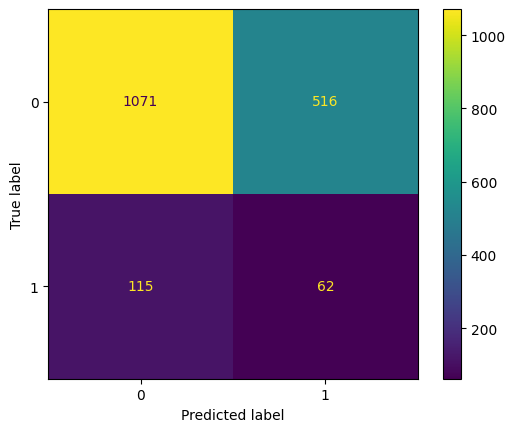

In [37]:
from sklearn.metrics import plot_roc_curve

logistic = linear_model.LogisticRegression(C=1e5, solver = "liblinear", multi_class = "auto")
logistic = logistic.fit(readcounts_train_X, pheno_train_y)
logistic_prev = logistic.predict(readcounts_test_X)

print("Recall score:", recall_score(pheno_test_y, logistic_prev))

cm_log = confusion_matrix(pheno_test_y, logistic_prev, labels = logistic.classes_)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels = logistic.classes_)
disp_log.plot()
plt.show()


### SVM's

Recall score: 0.2824858757062147


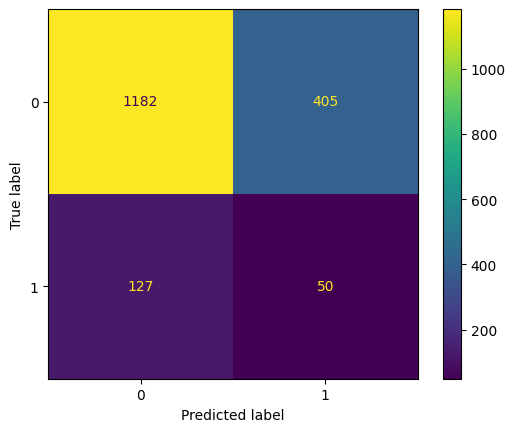

In [38]:
SVM = svm.SVC(gamma="scale", C=100.)
SVM = SVM.fit(readcounts_train_X, pheno_train_y)
svm_pred = SVM.predict(readcounts_test_X)

print("Recall score:", recall_score(pheno_test_y, svm_pred))
print("Precision score:", precision_score(pheno_test_y, svm_pred))

cm_svm = confusion_matrix(pheno_test_y, svm_pred, labels = SVM.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels = SVM.classes_)
disp_svm.plot()
plt.show()

### Feature Selecting

In [53]:
# Select percentile
import sklearn
from sklearn.feature_selection import SelectPercentile, chi2
X = readcounts_train_X
y = pheno_train_y
selection = SelectPercentile(chi2, percentile=8)
X_new = selection.fit_transform(X,y)
feature_names = selection.get_feature_names_out()
print(len(feature_names))

460


### Dataset com as features selecionadas

In [54]:
# Utilizou-se 8 % das melhores features
readcounts_train_selected = readcounts_train_X[feature_names]
readcounts_test_selected = readcounts_test_X[feature_names]

Recall score: 0.3389830508474576


c:\Users\Tiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


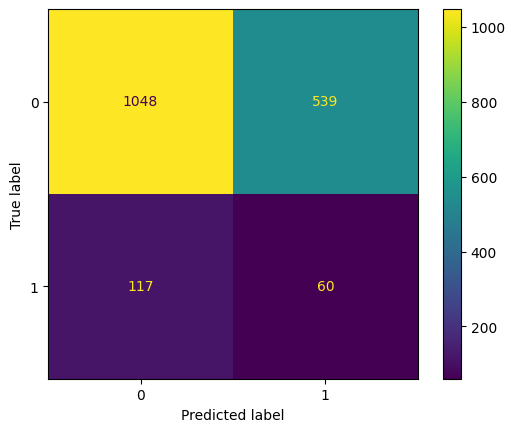

In [55]:
# Logistic regression para testar com as features selecionadas
logistic = linear_model.LogisticRegression(C=1e5, solver = "liblinear", multi_class = "auto")
logistic = logistic.fit(readcounts_train_selected, pheno_train_y)
logistic_prev = logistic.predict(readcounts_test_selected)

print("Recall score:", recall_score(pheno_test_y, logistic_prev))

cm_log = confusion_matrix(pheno_test_y, logistic_prev, labels = logistic.classes_)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels = logistic.classes_)
disp_log.plot()
plt.show()

In [88]:
SVM = svm.SVC(gamma="scale", C=100.)
SVM = SVM.fit(readcounts_train_selected, pheno_train_y)
svm_pred = SVM.predict(readcounts_test_selected)

print("Recall score:", recall_score(pheno_test_y, svm_pred))
print("Precision score:", precision_score(pheno_test_y, svm_pred))

cm_svm = confusion_matrix(pheno_test_y, svm_pred, labels = SVM.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels = SVM.classes_)
disp_svm.plot()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [3540, 6896]

## Combinação dos datasets

##### Voltar a carregar ambos os datasets

In [69]:
# Load dataset
pheno_train = pd.read_csv("train/pheno_training.csv")
pheno_test = pd.read_csv("test/pheno_test.csv")
# Drop na values
pheno_train = pheno_train.dropna()
pheno_test = pheno_test.dropna()
var = ["Event", "Event_time"]
pheno_train_y = pheno_train.PrevalentHFAIL + pheno_train.Event # data target with the patients that had HF before and after the first data collecting
pheno_train_y = pheno_train_y.map({2: 1, 0: 0, 1: 1}) # make the variable boolean
pheno_train_X = pheno_train.iloc[: , 1:] # Dropping the name of the patients
pheno_train_X = pheno_train_X.drop(columns = ["Event", "Event_time", "PrevalentHFAIL"]) # dropping the variables that we want to predict and event_time doesnt make sense  
pheno_test_y = pheno_test.PrevalentHFAIL + pheno_test.Event # data target with the patients that had HF before and after the first data collecting
pheno_test_y = pheno_test_y.map({2: 1, 0: 0, 1: 1}) # make the variable boolean
pheno_test_X = pheno_test.iloc[: , 1:] # Dropping the name of the patients
pheno_test_X = pheno_test_X.drop(columns = ["Event", "Event_time", "PrevalentHFAIL"]) # dropping the variables that we want to predict and event_time doesnt make sense

In [70]:
# Load dataset
readcounts_train = pd.read_csv("train/readcounts_training.csv")
readcounts_test = pd.read_csv("test/readcounts_test.csv")
# get indexes of the rows without nan values
inds_train = pheno_train.dropna().index
inds_test = pheno_test.dropna().index
# data structure organization - train
pheno_train_y = pheno_train.PrevalentHFAIL[inds_train]
readcounts_train_X = readcounts_train.iloc[:, 1:].T # tranpose dataset for compablility
readcounts_train_X.columns = list(readcounts_train["Unnamed: 0"]) # renaming columns for acessibility
readcounts_train_X = readcounts_train_X.iloc[inds_train] # using only rows without nan
# data structure organization - test
pheno_test_y = pheno_test.PrevalentHFAIL[inds_test]
readcounts_test_X = readcounts_test.iloc[:, 1:].T # tranpose dataset for compablility
readcounts_test_X.columns = list(readcounts_test["Unnamed: 0"]) # renaming columns for acessibility
readcounts_test_X = readcounts_test_X.iloc[inds_test] # using only rows without nan

In [71]:
# Utilizou-se 8 % das melhores features
readcounts_train_selected = readcounts_train_X[feature_names]
readcounts_test_selected = readcounts_test_X[feature_names]

# Mudar o nome das linhas para serem iguais
row_names_train = readcounts_train_selected.index
row_names_test = readcounts_test_selected.index
pheno_train_X.index = row_names_train
pheno_test_X.index = row_names_test


In [72]:
# Fusão dos datasets
new_df_train = pd.merge(pheno_train_X, readcounts_train_selected, left_index=True, right_index=True)
new_df_test = pd.merge(pheno_test_X, readcounts_test_selected, left_index=True, right_index=True)
Image(url='https://gifdb.com/images/thumbnail/fat-gogeta-fusion-dance-d6pof4c7mjdlwnr1.gif')

In [73]:
new_df_test

,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,SystolicBP,NonHDLcholesterol,Sex,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobacterium;s__Methanobacterium_sp._MB1,...,k__BacteriaPlasmid;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Shigella;s__Shigella_dysenteriae,k__BacteriaPlasmid;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Shigella;s__Shigella_flexneri,k__BacteriaPlasmid;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Erwiniaceae;g__Pantoea;s__Pantoea_agglomerans,k__BacteriaPlasmid;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Erwiniaceae;g__Pantoea;s__Pantoea_sp._PSNIH2,k__BacteriaPlasmid;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae;g__Yersinia;s__Yersinia_pestis,k__BacteriaPlasmid;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae;g__Acinetobacter;s__Acinetobacter_johnsonii,k__BacteriaPlasmid;p__Spirochaetes;c__Spirochaetia;o__Spirochaetales;f__Spirochaetaceae;g__Treponema;s__Treponema_succinifaciens,"k__Viruses;p__dsDNA_viruses,_no_RNA_stage;c__Caudovirales;o__;f__;g__;s__",k__Viruses;p__ssDNA_viruses;c__Inoviridae;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Enterobacteria_phage_YYZ-2008;o__;f__;g__;s__
Simulated_2211,73.860,30.140,1.0,1,0.0,0.0,154.046,5.010,0,0,...,63,4,0,0,0,0,0,1710,0,0
Simulated_1629,48.070,18.252,1.0,0,0.0,0.0,184.064,3.922,0,0,...,1,4,0,0,0,0,0,175,0,0
Simulated_1690,49.060,25.911,0.0,0,0.0,0.0,126.922,5.119,1,0,...,0,0,0,2,0,0,0,446,0,4
Simulated_1367,58.499,25.739,0.0,0,0.0,0.0,141.003,3.890,1,0,...,0,0,0,0,0,0,0,625,0,0
Simulated_3387,47.242,29.227,0.0,0,0.0,0.0,143.021,3.611,1,0,...,0,1,0,0,0,0,0,198,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Simulated_1628,56.091,25.580,1.0,0,0.0,0.0,169.903,4.480,1,0,...,0,0,47,0,0,0,0,29,0,0
Simulated_3424,46.889,22.762,0.0,0,0.0,0.0,122.995,3.669,0,0,...,0,0,0,0,0,0,0,152,0,0
Simulated_2215,70.841,24.808,0.0,0,0.0,0.0,190.934,6.069,1,0,...,0,0,0,1,0,0,0,93,0,0
Simulated_3426,25.920,20.520,0.0,0,0.0,0.0,117.032,2.789,1,0,...,0,0,0,0,0,0,0,23,0,0


In [76]:
# SMOTE -> Synthetic Minority Over-sampling Technique

from collections import Counter
print('Original dataset shape %s' % Counter(pheno_train_y))
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
new_df_train, pheno_train_y = sm.fit_resample(new_df_train, pheno_train_y)
print('Resampled dataset shape %s' % Counter(pheno_train_y))

Original dataset shape Counter({0.0: 3448, 1.0: 92})
Resampled dataset shape Counter({0.0: 3448, 1.0: 3448})


### Unsupervised learning
#### PCA

[0.32698205 0.12006396 0.09794342 0.08085094]


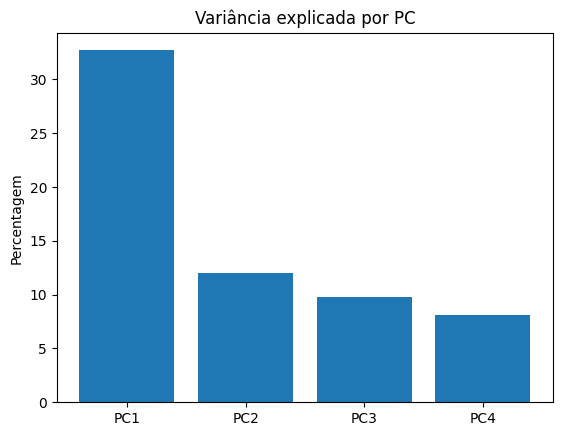

In [77]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

n=4
pca_iris = PCA(n_components=n)
pca_iris.fit(new_df_train)
x_reduced = pca_iris.transform(new_df_train)


print(pca_iris.explained_variance_ratio_)  
plt.bar(range(n), pca_iris.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

## Machine learning
#### Logistic Regression

Recall score: 0.07894736842105263
Precision score: 0.007692307692307693
Precision score: 0.7607709750566893
Precision score: 0.49110961818385396
Precision score: 0.953699425502295


c:\Users\Tiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


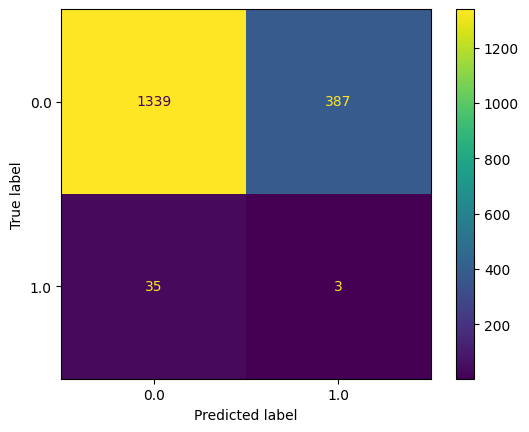

In [90]:
logistic = linear_model.LogisticRegression(C=1e5, solver = "liblinear", multi_class = "auto")
logistic = logistic.fit(new_df_train, pheno_train_y)
logistic_prev = logistic.predict(new_df_test)

print("Recall score:", recall_score(pheno_test_y, logistic_prev))
print("Precision score:", precision_score(pheno_test_y, logistic_prev))
print("Precision score:", precision_score(pheno_test_y, logistic_prev, average = "micro"))
print("Precision score:", precision_score(pheno_test_y, logistic_prev, average = "macro"))
print("Precision score:", precision_score(pheno_test_y, logistic_prev, average = "weighted"))

cm_log = confusion_matrix(pheno_test_y, logistic_prev, labels = logistic.classes_)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels = logistic.classes_)
disp_log.plot()
plt.show()

### SVM

Recall score: 0.0
Precision score: 0.0


c:\Users\Tiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


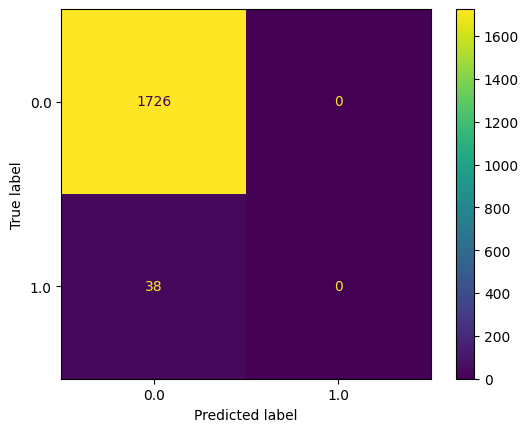

In [86]:
from sklearn import svm

SVM = svm.SVC(gamma=0.001, C=100.)
SVM = SVM.fit(new_df_train, pheno_train_y)
svm_pred = SVM.predict(new_df_test)
print("Recall score:", recall_score(pheno_test_y, svm_pred))
print("Precision score:", precision_score(pheno_test_y, svm_pred))

cm_svm = confusion_matrix(pheno_test_y, svm_pred, labels = SVM.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels = SVM.classes_)
disp_svm.plot()
plt.show()

### K Neighbors Classifier

Recall score: 0.21052631578947367
Precision score: 0.01834862385321101


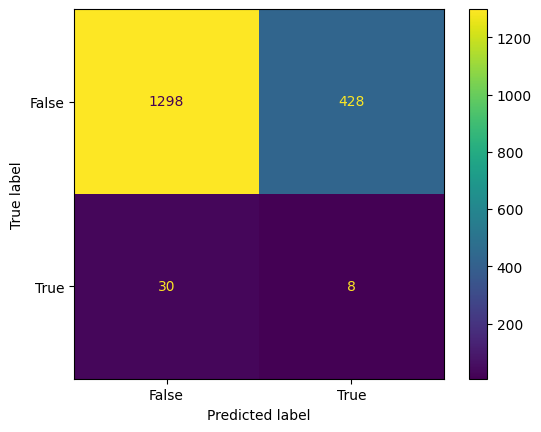

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(new_df_train, pheno_train_y)
knn_pred = knn.predict(new_df_test)
print("Recall score:", recall_score(pheno_test_y, knn_pred))
print("Precision score:", precision_score(pheno_test_y, knn_pred))

cm_knn = confusion_matrix(pheno_test_y, knn_pred)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels = [False, True])
disp_knn.plot()
plt.show()

### Random Forest Classifier

In [91]:
rf_model = RandomForestClassifier(n_estimators=100)
param_dist = {"max_depth": [2, 3, None], "max_features": [2,4,6], "min_samples_split": [2,4,6],
              "min_samples_leaf": [2,4,6], "bootstrap": [True, False], "criterion": ["gini", "entropy"]}

rand_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv = 5)
rand_search =rand_search.fit(new_df_train, pheno_train_y)
print (rand_search.best_estimator_)
report(rand_search.cv_results_)
print(rand_search.score(new_df_test, pheno_test_y))

RandomForestClassifier(criterion='entropy', max_features=2, min_samples_leaf=4,
                       min_samples_split=6)
Model with rank: 1
Mean validation score: 0.999 (std: 0.000)
Parameters: {'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 2, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.999 (std: 0.001)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 4, 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}

Model with rank: 3
Mean validation score: 0.999 (std: 0.001)
Parameters: {'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 6, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}

0.9784580498866213


In [93]:
# Rank 1 score of ensemble random forest
rf_model_best = RandomForestClassifier(n_estimators=100, min_samples_split = 4, min_samples_leaf= 4, max_features= 4, max_depth= None, criterion = 'entropy', bootstrap= True)
rf_model_best = rf_model_best.fit(new_df_train, pheno_train_y)
preds_rf_model = rf_model_best.predict(new_df_test)

print("Recall score:", recall_score(pheno_test_y, preds_rf_model))
print("Precision score:", precision_score(pheno_test_y, preds_rf_model))
print("Precision score(micro):", precision_score(pheno_test_y, preds_rf_model, average = "micro"))
print("Precision score(macro):", precision_score(pheno_test_y, preds_rf_model, average = "macro"))
print("Precision score(weighted):", precision_score(pheno_test_y, preds_rf_model, average = "weighted"))

Recall score: 0.0
Precision score: 0.0
Precision score(micro): 0.9784580498866213
Precision score(macro): 0.48922902494331066
Precision score(weighted): 0.95738015538793


c:\Users\Tiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Tiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Tiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Deep Learning

In [94]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50, 20))
scores = cross_val_score(mlp, new_df_train, pheno_train_y, cv = 5)
print(scores.mean())

c:\Users\Tiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Tiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Tiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarn

0.5091375813181155


c:\Users\Tiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
